<a href="https://colab.research.google.com/github/jhunwillparian0912-cell/Data-Analysis/blob/main/ynnastat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data.xlsx


In [ ]:
!pip install scikit-posthocs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, f_oneway, kruskal, spearmanr
import scikit_posthocs as sp

In [ ]:
df = pd.read_excel("data.xlsx")
df.head()

,student_no,strand,exposure,acceptance
0,1,A&D,2.357143,2.55
1,2,A&D,3.785714,3.00
2,3,A&D,2.642857,3.10
3,4,A&D,3.178571,4.10
4,5,A&D,3.000000,2.90


In [ ]:
#table summary for variable 1
exposure_table = df.groupby('strand')['exposure'].mean().reset_index()

def interpret_exposure(score):
    if score >= 9:
        return "Highly Numerate"
    elif score >= 7:
        return "Numerate"
    elif score >= 5:
        return "Nearly Numerate"
    elif score >= 3:
        return "Low Frequenct"
    else:
        return "Very Low Frequency"

exposure_table ['Interpretation'] = exposure_table['exposure'].apply(interpret_exposure)

print("Mean Exposure by Strand with Interpretation:")
print(exposure_table)

Mean Exposure by Strand with Interpretation:
  strand  exposure      Interpretation
0    A&D  3.086735  Moderate Frequency
1   ACAD  3.269481  Moderate Frequency
2    TVL  3.036745  Moderate Frequency


In [ ]:
exposure_table.to_excel('exposure_table.xlsx')
from google.colab import files
files.download('exposure_table.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#table summary for variable 2
acceptance_table = df.groupby('strand')['acceptance'].mean().reset_index()

def interpret_acceptance(score):
    if score >= 4.21:
        return "Very High Agreement"
    elif score >= 3.41:
        return "High Agreement"
    elif score >= 2.61:
        return "Neither Agree or Disagree"
    elif score >= 1.81:
        return "Low Agreement"
    else:
        return "Very Low Agreement"

acceptance_table['Interpretation'] = acceptance_table['acceptance'].apply(interpret_acceptance)

print("Mean Acceptance by Strand with Interpretation:")
print(acceptance_table)

Mean Acceptance by Strand with Interpretation:
  strand  acceptance             Interpretation
0    A&D    2.907143  Neither Agree or Disagree
1   ACAD    3.195909  Neither Agree or Disagree
2    TVL    3.019231  Neither Agree or Disagree


In [ ]:
acceptance_table.to_excel('acceptance_table.xlsx')
from google.colab import files
files.download('acceptance_table.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

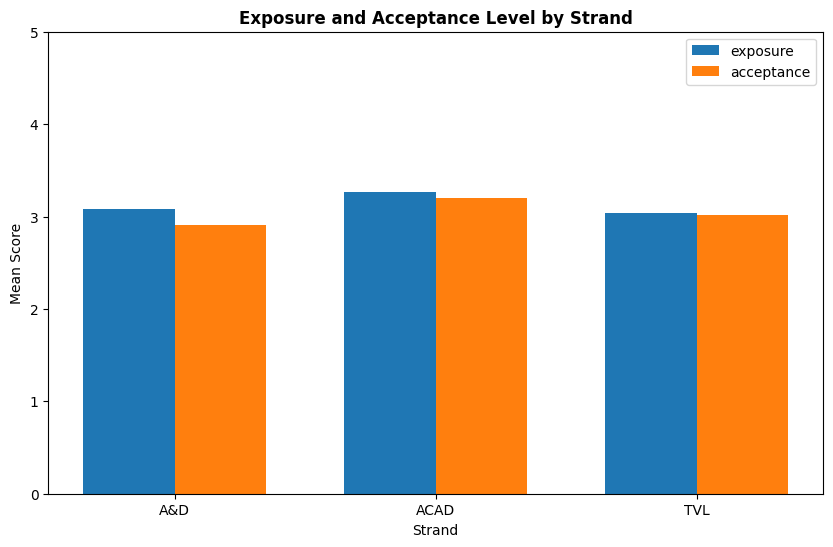

In [ ]:
#double bar graph
mean_std = df.groupby('strand')[['exposure','acceptance']].agg(['mean','std'])
strands = mean_std.index
exposure_mean = mean_std['exposure']['mean']
exposure_std = mean_std['exposure']['std']
acceptance_mean = mean_std['acceptance']['mean']
acceptance_std = mean_std['acceptance']['std']
x = np.arange(len(strands))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
# Remove yerr to remove the SD lines
rects1 = ax.bar(x - width/2, exposure_mean, width, label='exposure')
rects2 = ax.bar(x + width/2, acceptance_mean, width, label='acceptance')

ax.set_ylabel('Mean Score')
ax.set_xlabel('Strand')
ax.set_title('Exposure and Acceptance Level by Strand', fontsize=12, fontweight = 'bold')
ax.set_xticks(x)
plt.ylim(0,5)
ax.set_xticks(x)
ax.set_xticklabels(strands)
ax.legend()
plt.show()

In [ ]:
#NEEDS TO BE CHECKED
#levene's test
levene_results_list = []

group_col = 'strand'

for col in ['exposure', 'acceptance']:
    groups = [
        df[df[group_col] == g][col].dropna()
        for g in df[group_col].unique()
    ]

    stat, p = levene(*groups)

    interpretation = (
        "fail to reject H0 (equal variances)"
        if p > 0.05
        else "reject H0 (variances not equal)"
    )

    levene_results_list.append({
        'Variable': col,
        'Levene_statistic': stat,
        'p_value': p,
        'Interpretation': interpretation
    })

levene_results = pd.DataFrame(levene_results_list)
print("Levene's Test Results:")
print(levene_results)

Levene's Test Results:
     Variable  Levene_statistic   p_value                       Interpretation
0    exposure          6.072338  0.002714      reject H0 (variances not equal)
1  acceptance          2.166683  0.117018  fail to reject H0 (equal variances)


In [ ]:
levene_results.to_excel('levene_results.xlsx')
from google.colab import files
files.download('levene_results.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

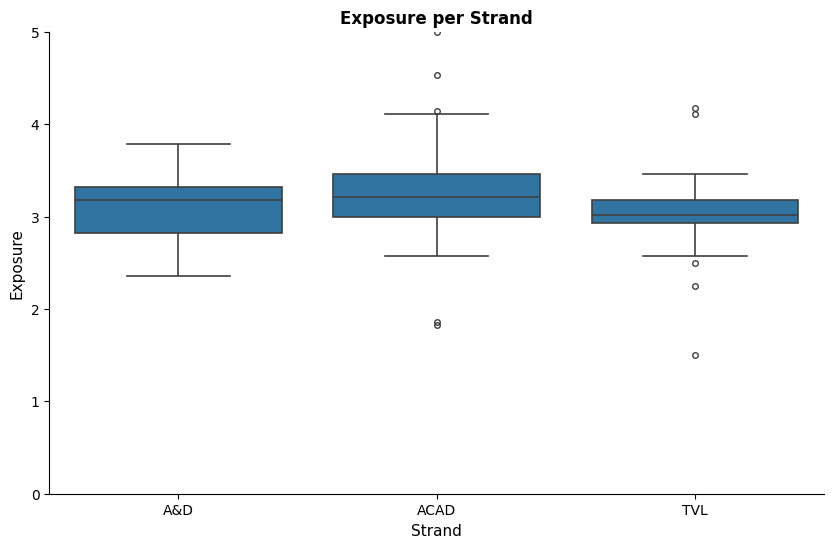

In [ ]:
#box plot for variable 1
plt.figure(figsize=(10,6))

sns.boxplot(
    x='strand',
    y='exposure',
    data=df,
    fliersize=4,
    linewidth=1.2
)

plt.title("Exposure per Strand", fontsize=12, fontweight='bold')
plt.xlabel("Strand", fontsize=11)
plt.ylabel("Exposure", fontsize=11)
plt.ylim(0,5)

sns.despine()

plt.show()

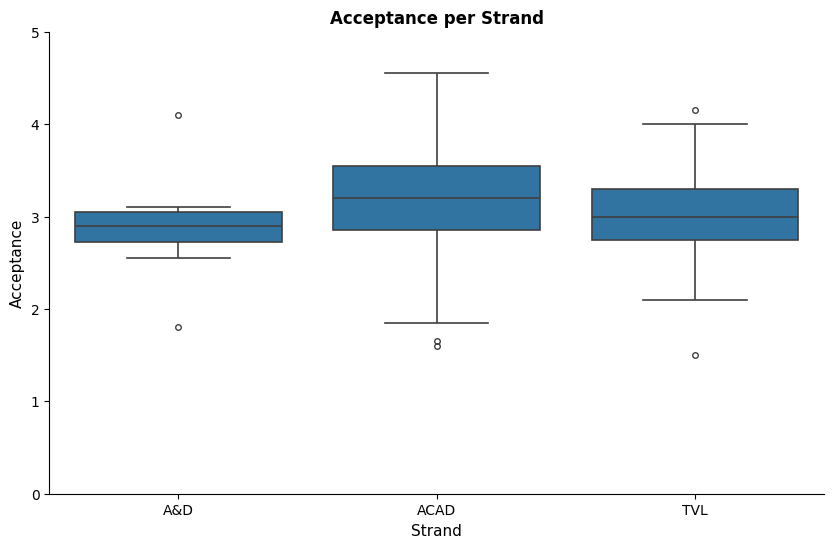

In [ ]:
#box plot for variable 1
plt.figure(figsize=(10,6))

sns.boxplot(
    x='strand',
    y='acceptance',
    data=df,
    fliersize=4,
    linewidth=1.2
)

plt.title("Acceptance per Strand", fontsize=12, fontweight='bold')
plt.xlabel("Strand", fontsize=11)
plt.ylabel("Acceptance", fontsize=11)
plt.ylim(0,5)

sns.despine()

plt.show()

In [ ]:
#shapiro-wilk test
shapiro_results_list = []

for col in ['exposure','acceptance']:
    W, p = shapiro(df[col])
    interpretation = "fail to reject H0" if p > 0.05 else "reject H0"
    shapiro_results_list.append({
        'Variable': col,
        'W_statistic': W,
        'p_value': p,
        'Interpretation': interpretation
        })

shapiro_results = pd.DataFrame(shapiro_results_list)
print("Shapiro-Wilk Test Results:")
print(shapiro_results)

Shapiro-Wilk Test Results:
     Variable  W_statistic       p_value Interpretation
0    exposure     0.908754  2.198413e-10      reject H0
1  acceptance     0.984055  1.371398e-02      reject H0


In [ ]:
shapiro_results.to_excel('shapiro_results.xlsx')
from google.colab import files
files.download('shapiro_results.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

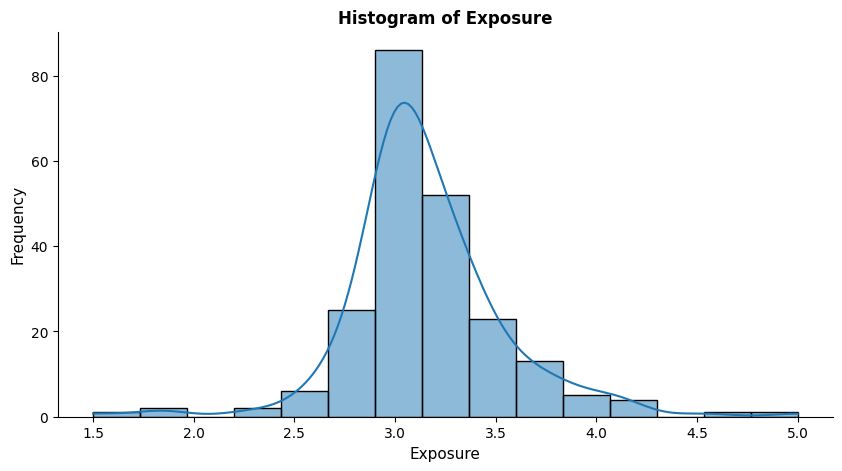

In [ ]:
#histogram variable 1
plt.figure(figsize=(10,5))

sns.histplot(
    df['exposure'],
    bins=15,
    kde=True,
    line_kws={'color':'#4D4D4D', 'linewidth':1.5}
)

plt.title("Histogram of Exposure", fontsize=12, fontweight='bold')
plt.xlabel("Exposure", fontsize=11)
plt.ylabel("Frequency", fontsize=11)

sns.despine()
plt.show()

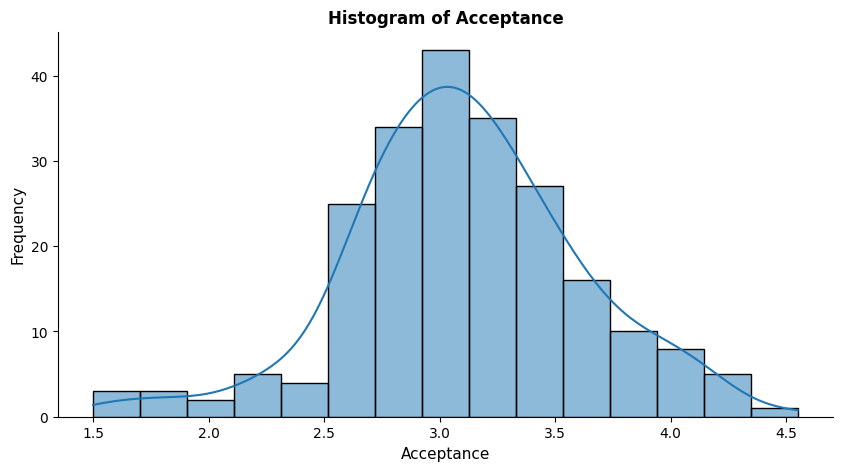

In [ ]:
#histrogram variable 2
plt.figure(figsize=(10,5))

sns.histplot(
    df['acceptance'],
    bins=15,
    kde=True,
    line_kws={'color':'#4D4D4D', 'linewidth':1.5}
)

plt.title("Histogram of Acceptance", fontsize=12, fontweight='bold')
plt.xlabel("Acceptance", fontsize=11)
plt.ylabel("Frequency", fontsize=11)

sns.despine()
plt.show()

In [ ]:
#kruskal-wallis variable 1
groups_exposure = [group['exposure'].values for name, group in df.groupby('strand')]
H_exposure, p_exposure = kruskal(*groups_exposure)

interpretation_exposure = "reject H0" if p_exposure < 0.05 else "fail to reject H0"

kruskal_exposure_table = pd.DataFrame({
    'Variable': ['exposure'],
    'H_statistic': [H_exposure],
    'p_value': [p_exposure],
    'Interpretation': [interpretation_exposure]
})

print("Kruskal-Wallis Test Results - Exposure:")
print(kruskal_exposure_table)

Kruskal-Wallis Test Results - Exposure:
   Variable  H_statistic   p_value Interpretation
0  exposure    23.413547  0.000008      reject H0


In [ ]:
kruskal_exposure_table.to_excel('kruskal_exposure_table.xlsx')
from google.colab import files
files.download('kruskal_exposure_table.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#kruskal-wallis variable 1
groups_acceptance = [group['acceptance'].values for name, group in df.groupby('strand')]
H_acceptance, p_acceptance = kruskal(*groups_acceptance)

interpretation_acceptance = "reject H0" if p_acceptance < 0.05 else "fail to reject H0"

kruskal_acceptance_table = pd.DataFrame({
    'Variable': ['acceptance'],
    'H_statistic': [H_acceptance],
    'p_value': [p_acceptance],
    'Interpretation': [interpretation_acceptance]
})

print("Kruskal-Wallis Test Results - Acceptance:")
print(kruskal_acceptance_table)

Kruskal-Wallis Test Results - Acceptance:
     Variable  H_statistic   p_value Interpretation
0  acceptance     8.395049  0.015033      reject H0


In [ ]:
kruskal_acceptance_table.to_excel('kruskal_acceptance_table.xlsx')
from google.colab import files
files.download('kruskal_acceptance_table.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dunn_results = sp.posthoc_dunn(df, val_col='exposure', group_col='strand', p_adjust='bonferroni')

# Round to 3 decimals
dunn_results_rounded = dunn_results.round(3)

# Function to format values
def format_value(x, original):
    if x == 0.0:
        # Use original value in scientific notation
        return f"{original:.3e}"
    else:
        return f"{x:.3f}"

# Apply formatting column-wise using map
dunn_results_formatted = dunn_results_rounded.copy()
for col in dunn_results.columns:
    dunn_results_formatted[col] = dunn_results_rounded[col].map(lambda x: format_value(x, dunn_results[col][dunn_results_rounded[col] == x].values[0]))

print("Post-hoc Dunn Test - Exposure")
print(dunn_results_formatted)

Post-hoc Dunn Test - Exposure
        A&D       ACAD        TVL
A&D   1.000      0.996      1.000
ACAD  0.996      1.000  3.964e-06
TVL   1.000  3.964e-06      1.000


In [ ]:
dunn_results_formatted.to_excel('dunn_results-exposure.xlsx')
from google.colab import files
files.download('dunn_results-exposure.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

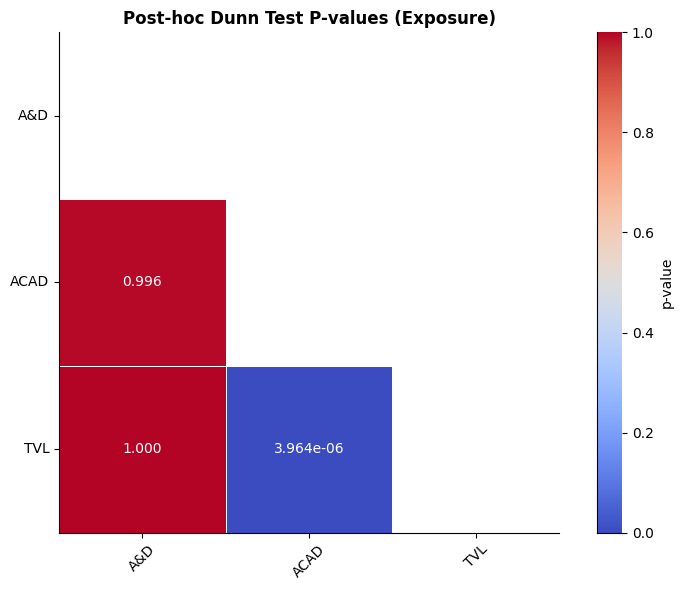

In [ ]:
mask = np.triu(np.ones_like(dunn_results_rounded, dtype=bool))

def heatmap_format(x, original):
    if x == 0.0:
        return f"{original:.3e}"
    else:
        return f"{x:.3f}"

annot = dunn_results_rounded.copy()
for col in dunn_results_rounded.columns:
    annot[col] = [
        heatmap_format(x, dunn_results[col].iloc[i])
        for i, x in enumerate(dunn_results_rounded[col])
    ]

plt.figure(figsize=(8,6))
sns.heatmap(
    dunn_results_rounded,
    mask=mask,
    annot=annot,
    cmap="coolwarm",
    cbar_kws={'label': 'p-value'},
    linewidths=0.5,
    fmt="",
    square=True
)

plt.title("Post-hoc Dunn Test P-values (Exposure)", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
dunn_results = sp.posthoc_dunn(df, val_col='acceptance', group_col='strand', p_adjust='bonferroni')

dunn_results_rounded = dunn_results.round(3)

print("Post-hoc Dunn Test - Acceptance")
print(dunn_results_rounded)

Post-hoc Dunn Test - Acceptance
        A&D   ACAD    TVL
A&D   1.000  0.356  1.000
ACAD  0.356  1.000  0.023
TVL   1.000  0.023  1.000


In [ ]:
dunn_results_rounded.to_excel('dunn_results-acceptance.xlsx')
from google.colab import files
files.download('dunn_results-acceptance.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

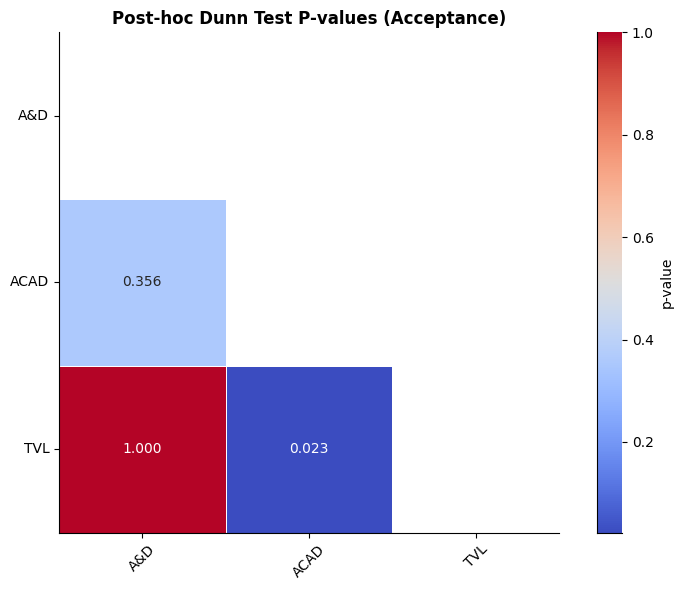

In [ ]:
mask = np.triu(np.ones_like(dunn_results_rounded, dtype=bool))

plt.figure(figsize=(8,6))

sns.heatmap(
    dunn_results_rounded,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    cbar_kws={'label': 'p-value'},
    linewidths=0.5,
    fmt=".3f",
    square=True
)

plt.title("Post-hoc Dunn Test P-values (Acceptance)", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
sns.despine()

plt.tight_layout()
plt.show()

In [ ]:
#spearman-rank correlation
rho, pval = spearmanr(df['exposure'], df['acceptance'])

significance = "Significant correlation" if pval < 0.05 else "No significant correlation"

if abs(rho) >= 0.80:
    strength = "Very Strong Positive" if rho > 0 else "Very Strong Negative"
elif abs(rho) >= 0.60:
    strength = "Strong Positive" if rho > 0 else "Strong Negative"
elif abs(rho) >= 0.40:
    strength = "Moderate Positive" if rho > 0 else "Moderate Negative"
elif abs(rho) >= 0.20:
    strength = "Weak Positive" if rho > 0 else "Weak Negative"
else:
    strength = "Negligible correlation"

spearman_table = pd.DataFrame({
    'Spearman_rho': [rho],
    'p_value': [pval],
    'Significance': [significance],
    'Strength': [strength]
})

print("Spearman Correlation Results:")
print(spearman_table)

Spearman Correlation Results:
   Spearman_rho       p_value             Significance           Strength
0      0.459483  6.085491e-13  Significant correlation  Moderate Positive


In [ ]:
spearman_table.to_excel('spearman_table.xlsx')
from google.colab import files
files.download('spearman_table.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

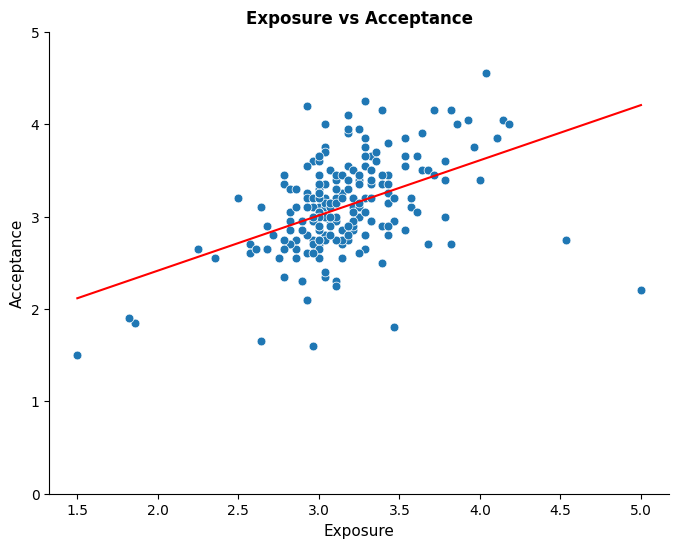

In [ ]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x='exposure',
    y='acceptance',
    data=df,
    s=40
)

sns.regplot(
    x='exposure',
    y='acceptance',
    data=df,
    scatter=False,
    color='red',
    line_kws={"linewidth":1.5},
    ci=None
)

plt.title("Exposure vs Acceptance", fontsize=12, fontweight='bold')
plt.xlabel("Exposure", fontsize=11)
plt.ylabel("Acceptance", fontsize=11)
plt.ylim(0,5)

sns.despine()

plt.show()